# Data Integration for property price prediction in Victoria

## About the dataset

We have the dataset for property sold in Victoria. Each column of the dataset is described as follows:

|COLUMN |DESCRIPTION|
|---|---|
|ID| A unique id for the property|
|Address| The property address|
|Price| The property price|
|Type| The type of property|
|Date|Date of sold|
|Rooms|Number of bedrooms|
|Bathroom|Number of bathrooms|
|Car|The number of parking space of the property|
|LandSize|The area of the propert|
|Age|The age of the property at the time of selling|
|Latitude|The Latitude of the property|
|Longitude|The Longitude of the property|

# Data Integration

## Importing libraries:

- **pandas** :  Used to handling dataframe and dataframe manipulation<br>
- **matplotlib** : For drawing plots of different format<br>
- **re** : Provides regular expression matching operations.<br>
- **numpy** :  Adds support for multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.<br>
- **datetime** : To convert string object to a date object
- **sklearn.linear_model** : Used to develop a linear regression model.
- **seaborn** : Used for data visualization
- **math** : It provides basic maths function.  
- **BeautifulSoup**: Is is used for extracting data out of HTML and XML files. 
- **ElementTree**: It is used to parse and navigate an XML document.
- **Shapely**: Used for set-theoretic analysis and manipulation of planar features. Useful for creating polygon with range of lattitude and longitudes.
- **shapefile** : Used for reading shape files. 
- **sklearn** : Used for linear regression model 
- **difflib** : For sequence matching
- **os** : To traverse directories and select files
- **zipFile** : Unzip Files

In [37]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import pandas as pd
import seaborn as sns
from math import sin, cos, sqrt, atan2, radians, log, sqrt
import xml.etree.ElementTree as etree
import numpy as np
import difflib

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from datetime import datetime

pd.options.mode.chained_assignment = None

# To traverse directories and select files
import os
from os import listdir
from os.path import isfile, join

# For unzipping GTFS files
import zipfile
import math

import numpy
import shapefile
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

%matplotlib inline

We will read a sample of original data as a dataframe which is available as sample.csv to avoid long processing time needed for the entire datasets.

In [3]:
#read original csv file 
house_df = pd.read_csv('dataset/sample.csv')

Let's check if there are any duplicates in the ID column

In [4]:
house_df[house_df.duplicated(keep=False)]['ID'].value_counts()

ID569947888    2
ID719536654    2
ID676735768    2
ID161649164    2
ID535688031    2
ID355235119    2
ID482468886    2
ID688200908    2
ID332701608    2
ID792281652    2
ID924233688    2
ID261735243    2
ID614834549    2
ID478489413    2
ID543489901    2
ID937799166    2
ID300707640    2
ID266487565    2
ID156754609    2
ID699088674    2
ID349347649    2
ID115945460    2
ID281884941    2
ID368235133    2
ID136980463    2
ID798515012    2
ID344871903    2
ID648177159    2
ID386550460    2
ID349451148    2
ID676060343    2
ID961172746    2
Name: ID, dtype: int64

There are a lot of duplicates in the ID columns as we saw in the above cell.

In the following cell, we see that the entire rows are duplicated so we need to remove those rows.

In [5]:
house_df[house_df.duplicated(keep=False)]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
1,ID161649164,77 Highfield Rd,5,h,3550000.0,18/03/2017,4.0,4.0,684.0,6.0,-37.83200,145.08530
4,ID115945460,4 Walter St,3,h,1045000.0,29/04/2017,2.0,3.0,526.0,29.0,-37.85500,144.87420
20,ID355235119,27 Wellington St,3,h,915000.0,22/07/2017,1.0,2.0,447.0,109.0,-37.79200,144.86856
31,ID482468886,2/35 Boisdale St,2,u,825000.0,13/05/2017,1.0,2.0,180.0,49.0,-37.83510,145.10300
46,ID349347649,26 Thomas St,3,h,1346000.0,10/12/2016,1.0,0.0,187.0,104.0,-37.81690,144.99600
63,ID569947888,10 Cecelia Dr,3,h,806000.0,27/05/2017,2.0,4.0,546.0,54.0,-37.74761,144.85210
77,ID115945460,4 Walter St,3,h,1045000.0,29/04/2017,2.0,3.0,526.0,29.0,-37.85500,144.87420
124,ID344871903,301/228 The Avenue,3,u,1560000.0,27/05/2017,2.0,1.0,2431.0,69.0,-37.78212,144.95755
126,ID676735768,12 Pacific Dr,4,h,840000.0,22/07/2017,2.0,2.0,383.0,59.0,-38.01958,145.12356
150,ID961172746,188 Rachelle Rd,3,h,835000.0,8/04/2017,2.0,2.0,700.0,39.0,-37.73220,144.87220


We will just keep the first occurence of row and remove rest of the duplicates.

In [6]:
house_df.drop_duplicates(keep='first', inplace=True)

# 1. Extracting Primary Schools Data

Lets collect data for primary schools with its rankings. For this, we will use urlopen to open the url. 

In [7]:
# send request to given url
primary_html = urlopen("http://www.schoolcatchment.com.au/?p=12301")

We will use BeautifulSoup to read the content of this page and use methods on it to extract content of various information on HTML tags.

In [8]:
#create beautifulSoup object to store xml content of this page
primary_bsobj = BeautifulSoup(primary_html, "lxml")

In [9]:
#find column names for the rankings table
columnNames = []
#extract all column names from th tags present within thead tags 
for i in range(1,8):
    columnNames.append(primary_bsobj.find("thead").
                       find("tr", {"class": "row-1 odd"}).
                       find("th", {"class": "column-"+str(i)}).text)

So here are the column names.

In [10]:
columnNames

['Ranking',
 'School Name',
 'State',
 'School Sector',
 'Location',
 'Total Enrolment',
 'Combined Score As Percentage of Number One School In Australia Regardless of School Sector']

From the xml content of this page we can see that for tr tags, the row-{even_number}even class has all information about even rows and row-{odd_number}odd class has all information about odd rows. 

Also, the numbers range from 2 to 502. So we can interate loop within this range and store the information about each column in separate list.

In [11]:
#Initialize the list for each column
rankings = []
school_names = []
states = []
school_sectors = []
locations = []
total_enrolments = []
combined_score = []

for i in range(2,502):
    #Extract information for even and odd rows separately
    if i%2 == 0:
        schoolInfo = primary_bsobj.find("tr", {"class": "row-"+str(i)+" even"}).findAll("td")
    else:
        schoolInfo = primary_bsobj.find("tr", {"class": "row-"+str(i)+" odd"}).findAll("td")
    #Extract content between the tags and store in particular list
    rankings.append(schoolInfo[0].text)
    school_names.append(schoolInfo[1].text)
    states.append(schoolInfo[2].text)
    school_sectors.append(schoolInfo[3].text)
    locations.append(schoolInfo[4].text)
    total_enrolments.append(schoolInfo[5].text)
    combined_score.append(schoolInfo[6].text)

We'll create zip of all list to create a dataframe and name columns with the column names that we extracted above. 

In [12]:
#Create a list of zip of all lists
zippedList =  list(zip(rankings, school_names, states, school_sectors, locations, total_enrolments, combined_score))
#create a dataframe with columnnames
primaryRank_df = pd.DataFrame(zippedList, columns=columnNames)
primaryRank_df['Ranking'] = primaryRank_df['Ranking'].astype(int)
primaryRank_df.head()

,Ranking,School Name,State,School Sector,Location,Total Enrolment,Combined Score As Percentage of Number One School In Australia Regardless of School Sector
0,1,Presbyterian Ladies' College,VIC,Independent,Major Cities,1412,96.65%
1,2,Haileybury College,VIC,Independent,Major Cities,3754,95.69%
2,3,Ballarat Clarendon College,VIC,Independent,Inner Regional,1326,93.29%
3,4,Fitzroy Community School,VIC,Independent,Major Cities,113,93.13%
4,5,Fintona Girls' School,VIC,Independent,Major Cities,456,92.96%


Let us investigate into this dataframe using describe()

In [13]:
primaryRank_df.describe()

,Ranking,School Name,State,School Sector,Location,Total Enrolment,Combined Score As Percentage of Number One School In Australia Regardless of School Sector
count,500,500,500,500,500,500,500
unique,500,471,1,3,3,388,299
top,369,St Mary's School,VIC,Government,Major Cities,314,83.16%
freq,1,10,500,292,430,3,6


We see that there are 471 unique values for school names so there are 29 duplicates. Lets look at which schools are duplicated. 

In [14]:
primaryRank_df[primaryRank_df.duplicated(['School Name'], keep=False)]['School Name'].unique()

array(['Sacred Heart School', 'Our Lady Help of Christians School',
       "St Joseph's School", "St Kevin's School", "St Mary's School",
       "St Paul's School", "St James' School", "St Christopher's School",
       "St Anne's School", "St Peter's School", "St Patrick's School"],
      dtype=object)

We see that first 11 schools have duplicate entries for rank. As specified, we will only consider first entry which is the minimum rank for each of these schools and drop the rest of the duplicated records.

In [15]:
primaryRank_df[primaryRank_df.duplicated(['School Name'], keep=False)]

,Ranking,School Name,State,School Sector,Location,Total Enrolment,Combined Score As Percentage of Number One School In Australia Regardless of School Sector
65,66,Sacred Heart School,VIC,Catholic,Major Cities,277,87.61%
89,90,Our Lady Help of Christians School,VIC,Catholic,Major Cities,200,86.99%
107,108,Our Lady Help of Christians School,VIC,Catholic,Major Cities,316,86.47%
112,113,St Joseph's School,VIC,Catholic,Major Cities,341,86.37%
129,130,St Kevin's School,VIC,Catholic,Major Cities,127,85.89%
158,159,St Mary's School,VIC,Catholic,Major Cities,344,85.31%
176,177,St Mary's School,VIC,Catholic,Major Cities,323,85.08%
202,203,Sacred Heart School,VIC,Catholic,Major Cities,267,84.67%
210,211,St Paul's School,VIC,Catholic,Major Cities,271,84.55%
247,248,St James' School,VIC,Catholic,Major Cities,337,84.09%


We will drop the duplicates by keeping first occurence as the we need to keep minimum rank for repeating schools. 

In [16]:
#dropping duplicates and keeping the first entry of unique School Name
primaryRank_df.drop_duplicates(['School Name'], keep='first', inplace=True)

In [17]:
len(primaryRank_df)

471

# 2. Extracting Secondary Schools Data

As the link for extracting secondary students have authentication to be handled, we could workaround the problem by authenticating manually and storing the html content in temp.html file. 

Then we can extract all content of this file using BeautifulSoup with html.parser 

In [19]:
#Extract html content using html.parser using BeautifulSoup
secondary_bsobj = BeautifulSoup(open("external_data/school-ranks.html"), "html.parser")

After observing the html file source, we see that school name is present in the first div tag and rank is present in the second div tags within li tag. 

We will extract the information from li tags present between div tags with `sites-tile-name-header`using find() method of BeautifulSoup object. Then we will store ranks of the school and school names in separate lists. 

In [20]:
#Initialize empty lists
secondary_list = []
secondary_ranks = []

#Extract secondary school names with ranks
schools_info = secondary_bsobj.find('div', {'class':'sites-tile-name-header'}).findAll('li')
for each_school in schools_info:
    #store school name and rank in list
    secondary_list.append(each_school.find('div').text)
    secondary_ranks.append(int(each_school.findAll('div')[1].text))

We'll create zip of all list to create a dataframe and name columns with the column names that we extracted above. 

In [21]:
#Create a list of zip of all lists
zippedList = list(zip(secondary_ranks, secondary_list))
#create a dataframe with columnnames
secondaryRank_df = pd.DataFrame(zippedList, columns=['Rank', 'School_Name'])
secondaryRank_df['Rank'] = secondaryRank_df.astype(int)
secondaryRank_df.head()

,Rank,School_Name
0,144,Academy of Mary Immaculate
1,534,Adass Israel School
2,535,Advance College of Education
3,194,Aitken College
4,280,Al Siraat College


Lets investigate dataframe using describe()

In [22]:
secondaryRank_df['School_Name'].describe()

count                           584
unique                          567
top       Catholic Regional College
freq                              5
Name: School_Name, dtype: object

We see that there are 567 unique values for school names so there are 584-567 = 17 duplicates. Lets look at which schools are duplicated.

In [23]:
secondaryRank_df[secondaryRank_df.duplicated(['School_Name'], keep=False)]

,Rank,School_Name
39,152,Beaconhills College
40,186,Beaconhills College
92,236,Catholic Regional College
93,271,Catholic Regional College
94,541,Catholic Regional College
95,542,Catholic Regional College
96,543,Catholic Regional College
97,24,Caulfield Grammar School
98,39,Caulfield Grammar School
102,465,Charles La Trobe P-12 College


In [24]:
#dropping duplicates and keeping the first entry of unique School Name
secondaryRank_df.drop_duplicates(['School_Name'], keep='first', inplace=True)

### Convert schools.xml to dataframe 

To find closest school to a particular property, we'll need information about schools with suburb names. This information is present in `schools.xml` file so we need to convert it into dataframe.

We will use ElementTree libray for this.

In [25]:
#Parsing xml
tree = etree.parse("external_data/schools.xml")

# Extracting root from the parsed document
root = tree.getroot()

# Extracting tag names from the parsed file for use as column names in the dataframe
col_names = []
for i in range(len(root[0])):
    col_names.append(root[0][i].tag)

# Iterating over each node in the parsed file and extracting values for each tag into a dictionary
rows = []
for node in root:
    values = dict()
    for name in col_names:
        values[name] = node.find(name).text if node is not None else None
    rows.append(values)

# Converting list of dictionaries to dataframe
school_df = pd.DataFrame(rows, columns = col_names)

In [26]:
school_df.head()

,Education_Sector,Entity_Type,School_No,School_Name,School_Type,Address_Line_1,Address_Line_2,Address_State,Postal_Address_Line_1,Postal_Address_Line_2,Full_Phone_No,LGA_ID,LGA_Name,X,Y
0,Government,1,1,Alberton Primary School,Primary,21 Thomson Street,None,VIC,21 Thomson Street,None,03 5183 2412,681,Wellington (S),146.666601,-38.617713
1,Government,1,3,Allansford and District Primary School,Primary,Frank Street,None,VIC,Frank Street,None,03 5565 1382,673,Warrnambool (C),142.590393,-38.386281
2,Government,1,4,Avoca Primary School,Primary,118 Barnett Street,None,VIC,P O Box 12,None,03 5465 3176,599,Pyrenees (S),143.475649,-37.084502
3,Government,1,8,Avenel Primary School,Primary,40 Anderson Street,None,VIC,40 Anderson Street,None,03 5796 2264,643,Strathbogie (S),145.234722,-36.901368
4,Government,1,12,Warrandyte Primary School,Primary,5-11 Forbes Street,None,VIC,5-11 Forbes Street,None,03 9844 3537,421,Manningham (C),145.21398,-37.742675


In [27]:
school_df.describe()

,Education_Sector,Entity_Type,School_No,School_Name,School_Type,Address_Line_1,Address_Line_2,Address_State,Postal_Address_Line_1,Postal_Address_Line_2,Full_Phone_No,LGA_ID,LGA_Name,X,Y
count,2254,2254,2254,2254,2254,2254,14,2254,2254,14,2254,2254,2254,2254,2254
unique,3,2,2112,2058,5,2222,13,1,2043,13,2252,80,80,2254,2254
top,Government,1,1642,St Mary's School,Primary,Church Street,Punt Road Oval,VIC,P O Box 42,Werribee Plaza,03 9213 2222,275,Greater Geelong (C),145.147724,-38.132857
freq,1539,1539,2,36,1556,5,2,2254,9,2,2,83,83,1,1


We will need to separate primary schools from secondary schools so that it becomes easy to merge dataframes for these school types.

Lets see school_type column.

In [28]:
school_df['School_Type'].value_counts()

Primary      1556
Secondary     343
Pri/Sec       243
Special       108
Language        4
Name: School_Type, dtype: int64

We need to divide the dataframe into primary and secondary schools and schools with School_Type = 'Pri/Sec' should be included in both of these dataframes.

In [29]:
#dataframe containing primary schools
pschool_df = school_df[school_df['School_Type'].isin(['Primary','Pri/Sec'])]
len(pschool_df)

1799

In [32]:
#dataframe containing secondary schools
sschool_df = school_df[school_df['School_Type'].isin(['Secondary','Pri/Sec'])]
len(sschool_df)

586

We need to see if there is no mismatch between school namees in the rankings dataframe and the dataframe that we got from the xml file.

We can use the sequence matcher to check similarity ratio and through observation we can take decision about any change needs to be made

In [33]:
#Converting all schools in list
primary_schools = pschool_df['School_Name'].tolist()
secondary_schools = sschool_df['School_Name'].tolist()

We will extract schools having maximum similarity ratio with schools from school.xml. We will do this for primary and secondary schoools. Then we will observe the difference in the output and take actions accordingly.

In [34]:
#get schools with maximum sequence match in school name.
def primary_seq_match(x):    
    max_ratio = 0
    matching_school = ''
    #get maximum value of max_ratio
    for i in primary_schools:
        #match sequence of two schools
        seq=difflib.SequenceMatcher(None, x,i)
        if seq.ratio() > max_ratio:
            max_ratio = seq.ratio()
            matching_school = i
    return (max_ratio, matching_school)

We will see schools with maximum but not exact match.

In [38]:
#print schools with more than 95% and less than 100% match
for i in primaryRank_df.index:
    p_school = primary_seq_match(primaryRank_df.loc[i,'School Name'])
    if p_school[0] > 0.95 and p_school[0] < 1:
        print(primaryRank_df.loc[i,'School Name'], p_school)

Nunawading Christian College - Primary (0.972972972972973, 'Nunawading Christian College-Primary')
Mckinnon Primary School (0.9565217391304348, 'McKinnon Primary School')
Pleasant Street Primary School ( Ballarat) (0.9879518072289156, 'Pleasant Street Primary School (Ballarat)')


We can see that there are quite a few schools whose name does not match exactly to the school names from xml.
After observing we can see that there are spelling mistakes, non uniform spacing, in schools' names.

We will replace these values with correct primary school names.

In [39]:
#replacing schools having ranks with correct school names
for i in primaryRank_df.index:
    p_school = primary_seq_match(primaryRank_df.loc[i,'School Name'])
    if p_school[0] > 0.95 and p_school[0] < 1:
        primaryRank_df.loc[i,'School Name'] = p_school[1]

#### For secondary schools

In [40]:
#get schools with maximum sequence match in school name.
def secondary_seq_match(x):    
    max_ratio = 0
    matching_school = ''
    for i in secondary_schools:
        #match sequence of two schools
        seq=difflib.SequenceMatcher(None, x,i)
        if seq.ratio() > max_ratio:
            max_ratio = seq.ratio()
            matching_school = i
    return (max_ratio, matching_school)

observe schools with  maximum but not exact match.

In [41]:
for i in secondaryRank_df.index:
    s_school = secondary_seq_match(secondaryRank_df.loc[i,'School_Name'])
    if s_school[0] > 0.95 and s_school[0] < 1:
        print(secondaryRank_df.loc[i,'School_Name'], s_school)

Belgrave Heights Christian Schl (0.96875, 'Belgrave Heights Christian School')
Caroline Chisholm Catholic Coll (0.9538461538461539, 'Caroline Chisholm Catholic College')
Derrinallum P12 College (0.9787234042553191, 'Derrinallum P-12 College')
Fintona Girls School (0.975609756097561, "Fintona Girls' School")
Goulburn Valley Grammar Schl (0.9655172413793104, 'Goulburn Valley Grammar School')
Kings College (0.9629629629629629, "King's College")
Lauriston Girls School (0.9777777777777777, "Lauriston Girls' School")
Melbourne Girls' College (0.9787234042553191, 'Melbourne Girls College')
Melbourne Rudolf Steiner Schl (0.9666666666666667, 'Melbourne Rudolf Steiner School')
Methodist Ladies College (0.9795918367346939, "Methodist Ladies' College")
Narre Warren Sth P-12 College (0.9666666666666667, 'Narre Warren South P-12 College')
St Paul's Anglican Grammar Schl (0.96875, "St Paul's Anglican Grammar School")
Stott's College (0.967741935483871, "Stott's Colleges")


We see that schools with ranking list has discrepancies like sort names for 'school' and 'college', non uniform space, special characters. We need to fix that.

We will replace these incorrect values with correct values.

In [42]:
for i in secondaryRank_df.index:
    s_school = secondary_seq_match(secondaryRank_df.loc[i,'School_Name'])
    if s_school[0] > 0.95 and s_school[0] < 1:
        secondaryRank_df.loc[i,'School_Name'] = s_school[1]

### Merging secondary schools and secondaryRanking dataframes.

We will merge secondary schools with secondaryRanking to get lattitude longitude with Rank in single dataframe. We will use left join as there can be schools without Ranks.

In [43]:
#left join dataframe on School_name
secondaryRank_df = pd.merge(sschool_df[['School_Name', 'X', 'Y']], secondaryRank_df, on='School_Name', how='left')
secondaryRank_df.head()

,School_Name,X,Y,Rank
0,Bright P-12 College,146.960928,-36.733105,203.0
1,Lake Bolac College,142.837903,-37.720241,NaN
2,Bannockburn P-12 College,144.160668,-38.042004,NaN
3,Murtoa College,142.475745,-36.623495,NaN
4,Pyramid Hill College,144.113679,-36.04736,NaN


In [44]:
secondaryRank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 585
Data columns (total 4 columns):
School_Name    586 non-null object
X              586 non-null object
Y              586 non-null object
Rank           403 non-null float64
dtypes: float64(1), object(3)
memory usage: 22.9+ KB


We need to convert data type of X and Ycolumns to numerics as they will create problems further while calculating distance between two lat longs.

In [45]:
#Convert X, Y columns to numeric
secondaryRank_df[["X", "Y"]] = secondaryRank_df[["X", "Y"]].apply(pd.to_numeric)

### Merging primary schools and primaryRanking Dataframes.

We will merge primary schools with primaryRanking to get lattitude longitude with Rank in single dataframe. We will use left join as there can be schools in pschools_df without Ranks.

In [46]:
primaryRank_df = pd.merge(pschool_df[['School_Name', 'X', 'Y']], primaryRank_df[['Ranking', 'School Name']], left_on='School_Name', right_on='School Name', how='left')
primaryRank_df.head()

,School_Name,X,Y,Ranking,School Name
0,Alberton Primary School,146.666601,-38.617713,NaN,NaN
1,Allansford and District Primary School,142.590393,-38.386281,NaN,NaN
2,Avoca Primary School,143.475649,-37.084502,NaN,NaN
3,Avenel Primary School,145.234722,-36.901368,435,Avenel Primary School
4,Warrandyte Primary School,145.21398,-37.742675,257,Warrandyte Primary School


In [47]:
#Drop duplicate column School Name
primaryRank_df.drop('School Name', axis=1, inplace=True)
primaryRank_df.head()

,School_Name,X,Y,Ranking
0,Alberton Primary School,146.666601,-38.617713,NaN
1,Allansford and District Primary School,142.590393,-38.386281,NaN
2,Avoca Primary School,143.475649,-37.084502,NaN
3,Avenel Primary School,145.234722,-36.901368,435
4,Warrandyte Primary School,145.21398,-37.742675,257


In [48]:
primaryRank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1799 entries, 0 to 1798
Data columns (total 4 columns):
School_Name    1799 non-null object
X              1799 non-null object
Y              1799 non-null object
Ranking        627 non-null object
dtypes: object(4)
memory usage: 70.3+ KB


We need to convert data type of X and Ycolumns to numerics as they will create problems further while calculating distance between two lat longs.

In [49]:
#Convert X, Y columns to numeric
primaryRank_df[["X", "Y"]] = primaryRank_df[["X", "Y"]].apply(pd.to_numeric)

# 3. Finding Distance (in km) between house, and primary and secondary school

We will find the closest primary school to each property and caculate the closest distance. For finding the distance, we will calculate the Haversine distance as we need the distance between two (lat, long) points.

We will perform same steps for finding closest secondary schools.

In [50]:
#Intialize the distance to 0
primaryRank_df['Distance'] = 0
secondaryRank_df['Distance'] = 0

In [51]:
# approximate radius of earth in km
R = 6378.0


def closest_Primarydistance(x):
    '''
    x : list of [latitude, longitude] of property
    return:
        closest_pschool: closest primary school, its distance to property, and ranking
    '''
    
    #converting lat, long to radians
    lat1 = radians(x[0])
    lon1 = radians(x[1])
    lat2 = primaryRank_df['Y'].apply(radians)
    lon2 = primaryRank_df['X'].apply(radians)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    #Distance to primary school in km
    primaryRank_df['Distance'] = R * c
    
    closest_pschool = primaryRank_df.loc[primaryRank_df['Distance'].idxmin(),['School_Name','Distance', 'Ranking'] ]

    return closest_pschool

In [52]:
#Store School_Name,Distance,Ranking in p_schools
p_schools = house_df[['Lattitude', 'Longtitude']].apply(
    lambda x: closest_Primarydistance(x), axis=1).fillna('not ranked', downcast='infer')

p_schools.head()

,School_Name,Distance,Ranking
0,Holy Name School,1.055208,463
1,Canterbury Primary School,0.221939,43
2,Sacred Heart School,0.281517,66
3,St Theresa's School,0.170962,393
4,Bayside P-12 College,1.013598,not ranked


We will rename columns as per specification

In [53]:
p_schools.columns = ['closest_primary_school', 'distance_to_closest_primary', 'primary_school_ranking']

In [54]:
#Concatenate this dataframe on axis1 to original dataframe
house_df = pd.concat([house_df, p_schools], axis=1)

In [55]:
from math import sin, cos, sqrt,radians

# approximate radius of earth in km
R = 6378.0

def closest_Secondarydistance(x):
    '''
    x : list of [latitude, longitude] of property
    return:
        closest_pschool: closest secondary school, its distance to property, and ranking
    '''
    
    #converting lat, long to radians
    lat1 = radians(x[0])
    lon1 = radians(x[1])
    lat2 = secondaryRank_df['Y'].apply(radians)
    lon2 = secondaryRank_df['X'].apply(radians)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    #Distance to secondary school in km
    secondaryRank_df['Distance'] = R * c
    
    closest_sschool = secondaryRank_df.loc[secondaryRank_df['Distance'].idxmin(),['School_Name','Distance', 'Rank'] ]

    return closest_sschool

In [56]:
#Store School_Name,Distance,Ranking in s_schools
s_schools = house_df[['Lattitude', 'Longtitude']].apply(lambda x: closest_Secondarydistance(x), axis=1).fillna('not ranked', downcast='infer')
s_schools.head()

,School_Name,Distance,Rank
0,Preston High School,0.821495,not ranked
1,Siena College Ltd,0.302698,not ranked
2,Bayside P-12 College,1.806498,243
3,Sunshine College,1.073238,233
4,Bayside P-12 College,1.013598,243


Rename columns as per specification and concatenate it to original dataframe.

In [57]:
s_schools.columns = ['closest_secondary_school', 'distance_to_closest_secondary', 'secondary_school_ranking']
house_df = pd.concat([house_df, s_schools], axis=1)

In [59]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 699
Data columns (total 18 columns):
ID                               688 non-null object
Address                          688 non-null object
Rooms                            688 non-null int64
Type                             688 non-null object
Price                            688 non-null float64
Date                             688 non-null object
Bathroom                         688 non-null float64
Car                              688 non-null float64
Landsize                         688 non-null float64
Age                              688 non-null float64
Lattitude                        688 non-null float64
Longtitude                       688 non-null float64
closest_primary_school           688 non-null object
distance_to_closest_primary      688 non-null float64
primary_school_ranking           688 non-null object
closest_secondary_school         688 non-null object
distance_to_closest_secondary    688 non

# 4. Reading data from the GTFS file

We first unzip the gtfs.zip file collected from [Public Transport Victoria website](https://www.ptv.vic.gov.au/footer/data-and-reporting/datasets/)

In [60]:
with zipfile.ZipFile("external_data/gtfs.zip","r") as zip_ref:
    zip_ref.extractall("unzipped_level1")

On exploring the gtfs.zip file, we realize the file has the following structure:
                                
                                gtfs.zip----|
                                            |---->1---->google_transit.zip---|agency.txt
                                            |---->2---->.                    |calendar.txt
                                            |---->.---->.                    |calendar_dates.txt
                                            |---->.---->.                    |routes.txt
                                            |---->11--->.                    |shapes.txt
                                                                             |stop_times.txt
                                                                             |stops.txt
                                                                             |trips.txt                                     


From http://data.ptv.vic.gov.au/downloads/PTVGTFSReleaseNotes.pdf we realize that only Folders 1 and 2 (Regional Train and Metropolitan train) are only required. 

We exclude folder 10 (Interstate) as the properties in the input dataframe all lie within Victoria. The rest of the folders are excluded as they contain transit data of types other than Train.

In [61]:
# Selecting folders 1 and 2 to extract data from
dir_list=['1','2']

We now extract data from the text files in these directories into dataframes

In [62]:
# Extracting text files from folders 1 and 2 and concatenating them into a single dataframe
calendar_df = pd.concat((pd.read_csv(zipfile.ZipFile('unzipped_level1/'+f+'/google_transit.zip').open('calendar.txt')) for f in dir_list), ignore_index=True)
calendar_dates_df = pd.concat((pd.read_csv(zipfile.ZipFile('unzipped_level1/'+f+'/google_transit.zip').open('calendar_dates.txt')) for f in dir_list), ignore_index=True)
routes_df = pd.concat((pd.read_csv(zipfile.ZipFile('unzipped_level1/'+f+'/google_transit.zip').open('routes.txt')) for f in dir_list), ignore_index=True)
shapes_df = pd.concat((pd.read_csv(zipfile.ZipFile('unzipped_level1/'+f+'/google_transit.zip').open('shapes.txt')) for f in dir_list), ignore_index=True)
stop_times_df = pd.concat((pd.read_csv(zipfile.ZipFile('unzipped_level1/'+f+'/google_transit.zip').open('stop_times.txt')) for f in dir_list), ignore_index=True)
stops_df = pd.concat((pd.read_csv(zipfile.ZipFile('unzipped_level1/'+f+'/google_transit.zip').open('stops.txt')) for f in dir_list), ignore_index=True)
trips_df = pd.concat((pd.read_csv(zipfile.ZipFile('unzipped_level1/'+f+'/google_transit.zip').open('trips.txt')) for f in dir_list), ignore_index=True)

References:  
*Reading CSV zipped files* retreived from https://stackoverflow.com/a/37100335  
*Import multiple CSV files into one dataframe* retreived from https://stackoverflow.com/a/36416258

From these datasets, we will calculate following values for following three columns:

1. **train_station_id**: The closest train station to the property that has a direct trip to the Southern Cross Railway Station on all weekdays between 7:00 - 9:30.
2. **distance_to_train_station**: The direct distance from this closest train station to the property.
3. **travel_min_to_CBD**: The average travel time (minutes) from the closest train station (regional/metropolitan) that has a direct trip to the “Southern Cross Railway Station” on weekdays departing between 7 to 9:30 am.


We explore these datasets to identify relevant datasets and the relationship between them. We observe the following relationships:
<img src="rdbms_schema.png">

Based on this information, we follow the following steps to extract the relevant data:

<img src="process_flow.png">

In words:
1. a. Identify the stop_ids that correspond to Southern Cross (southerncross_stopId) based on stop_name in stops_df  
   b. Using southerncross_stopId and shape_dist_traveled find all trip_ids in stop_times_df that pass through Southern Cross but does not start there. 
2. a. From calendar_df, identify the service_ids that run on all weekdays and find their corresponding trip_id in trips_df  
   b. Using this information, create a list of all trip_ids that run through Southern Cross on all weekdays
3. Find the intersection of lists created in 1 and 2 to create list of stations that pass through Southern Cross on all weekdays
4. For these trip_ids, using stop_times_df, find all stations for which there is a departure between 7:00 and 9:30 and find the time the corresponding trip arrives at Southern Cross
5. Using the latitude and longitude in stops_df, among the stations in step 6, find the closest station to each of the properties in the input dataset and the distance from these stations to the proerties.
6. Find the trip travel time for each stations in these trips as a difference between arrival time at Southern Cross and departure time at the station.
7. For each of these closest stations, calculate the average of the travel time to Southern Cross

## 4.1. Finding trips passing through Southern Cross 

We first find records pertaining to Southern Cross station in the stops_df dataframe and save the stop_ids into a list

In [63]:
southerncross_stops = stops_df.loc[stops_df['stop_name'].str.contains('Southern Cross'),['stop_id','stop_name']]
pd.set_option('display.max_colwidth', 0)
southerncross_stops

,stop_id,stop_name
7,20043,Southern Cross Railway Station (Melbourne City)
319,22180,Southern Cross Railway Station (Melbourne City)


We observe that there are multiple stop_ids corresponding to the same stop_name in the dataset. To prevent duplicates and hence avoid issues that may arise when calculating the value of travel_min_to_CBD, we replace the values of stop_id such that each stop_name has only one corresponding stop_id in the datasets. 

In [64]:
# Creating a dictionary to manufacture a unique mapping between stop_name and stop_id
stops_dict = dict(zip(stops_df['stop_name'], stops_df['stop_id']))

# Adding a new_stop_id column to stops_df and then creating a dictionary to create a mapping between 
# original stop_ids and the set of unique stop_ids  
stops_df['new_stop_id'] = stops_df['stop_name'].apply(lambda x: stops_dict[x])
stop_update_dict = dict(zip(stops_df['stop_id'], stops_df['new_stop_id']))

# Updating values of stop_ids in both stops_df and stop_times_df
stops_df['stop_id'] = stops_df['stop_id'].apply(lambda x: stop_update_dict[x])
stop_times_df['stop_id'] = stop_times_df['stop_id'].apply(lambda x: stop_update_dict[x])

# Dropping created new_stop_id column and duplicate rows from stops_df dataframe
stops_df.drop(['new_stop_id'], inplace=True, axis=1)
stops_df.drop_duplicates(keep="first", inplace=True)

Saving all stop_ids of Southern Cross into a list,  we observe that Southern Cross now has only one corresponding stop_id.

In [65]:
southerncross_stops = stops_df.loc[stops_df['stop_name'].str.contains('Southern Cross'),['stop_id','stop_name']]
southerncross_stopId = list(set(southerncross_stops['stop_id'].tolist()))
print(southerncross_stopId)

[22180]


Using this list, we find all trip_ids that pass through southern cross but does not start at Southern Cross. We set shape_dist_traveled != 0 to ensure the trip does not start at Southern Cross.

In [66]:
trips_to_sc = list(set(stop_times_df.loc[(stop_times_df['stop_id'].isin(southerncross_stopId)) & 
                                         (stop_times_df['shape_dist_traveled'] != 0),'trip_id']))

## 4.2. Finding trips that run on all weekdays

So we will now identify the trips that run on all weekdays

In [67]:
# Creating an 'all_weekdays' flag summing values across all weekdays and testing equality with 5
calendar_df['all_weekdays'] = calendar_df.apply(
    lambda x: (x['monday']+x['tuesday']+x['wednesday']+x['thursday']+x['friday'])==5, axis=1
)

In [68]:
# Creating a distinct list of all service_ids running on all weekdays
service_list = list(set(calendar_df.loc[calendar_df['all_weekdays']==True,'service_id'].tolist()))
print(service_list)

['T0', 'T0_3', 'T0_1', 'T0_2']


For each of these service_ids, we find the corresponding trip_ids and save them into a list 

In [69]:
trips_list = trips_df.loc[trips_df['service_id'].isin(service_list)]['trip_id'].values.tolist()

## 4.3. Finding trips that pass through Southern Cross on all weekdays

Finding intersection of lists made in 1 and 2 to find all trips that pass through Southern Cross on all weekdays

In [70]:
weekday_trips_to_sc = list(set(trips_to_sc).intersection(set(trips_list)))

## 4.4. Finding all stations in relevant trips having a departure between 7:00 and 9:30 

We filter the stop_times dataframe to include only those records having trips through Southern Cross on all weekdays

In [71]:
filtered_stop_times_df = stop_times_df.loc[stop_times_df['trip_id'].isin(weekday_trips_to_sc)]

We now filter this dataframe to include only those stations which have departures in between 7:00 to 9:30. We convert departure_time to a datetime object for this. To carry out this type conversion, we first remove records having hours in departure_time greater than 23. We remove these records as our target stations should have a departure bfore 9:30 and, realistically, a trip should not take more than 14 hours to reach Southern Cross from any of these stations.

In [72]:
# Removing records haging hour(departure_time) > 23.
filtered_stop_times_df = filtered_stop_times_df.loc[~filtered_stop_times_df['departure_time'].str.startswith(('24','25','26','27'))]

In [73]:
# Converting departure_time to a datatime object
filtered_stop_times_df['time_depart'] = filtered_stop_times_df['departure_time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S'))

We now extract and save records where the stop is Southern Cross. This is done to extract time of arrival of a trip at Southern Cross. 

In [74]:
# Selecting stops in Southern Cross
stop_times_sc = filtered_stop_times_df.loc[filtered_stop_times_df['stop_id'].isin(southerncross_stopId)]

# Casting arrival_time as a datatime object to create the time_arrive_sc variable
stop_times_sc['time_arrive_sc'] = stop_times_sc['arrival_time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S'))

Filtering the filtered_stop_times_df dataframe to include only those stops having a departure in between 7:00 and 9:30

In [75]:
# Declaring minimum and maximum departure times
min_time = datetime.strptime('07:00:00', '%H:%M:%S')
max_time = datetime.strptime('09:30:00', '%H:%M:%S')

# Filtering the dataframe to include only the records having departure in between min_time and max_time
filtered_stop_times_df = filtered_stop_times_df.loc[(min_time <= filtered_stop_times_df['time_depart']) & 
                                                    (filtered_stop_times_df['time_depart'] <= max_time)]

Calculating travel_time as difference between arrival time at Southern Cross and departure time from a station for a particular trip. We then filter the dataframe to include only records with postive travel_time (ie. cases where the stop is before Southern Cross in sequence).

In [76]:
# Merging Southern Cross arrival dataframe with the filtered_stop_times dataframe
travel_time_df = pd.merge(filtered_stop_times_df, stop_times_sc[["time_arrive_sc","trip_id"]],
                          on="trip_id", how="left")

In [77]:
# Calculating travel_time
travel_time_df["travel_time"] = travel_time_df.apply(
    lambda x: (x["time_arrive_sc"] - x["time_depart"]).total_seconds()/60.0, axis=1
)

# Keeping only the rows with positive travel time.
travel_time_df = travel_time_df.loc[travel_time_df["travel_time"]>=0]

## 4.5. Finding the station closest to each property 

Extracting unique stop_ids from the travel_time dataframe and filtering the stops_df dataframe to include only these stops.
Doing this ensures that the nearest station selected will have a direct trip to Southern Cross on all weekdays between 7:00 to 9:30 

In [78]:
# Extracting unique stop_ids from travel_time_df
stops_to_sc = list(set(travel_time_df['stop_id']))

# Filtering stops_df to include only relevant stations
stops_sc_location = stops_df.loc[stops_df['stop_id'].isin(stops_to_sc)]

In [79]:
# Creating a function to calculate distance between the station and Southern Cross station
def cal_dist(lat_1, lng_1, lat_2, lng_2): 
    
    # Converting lat-long from degree to radians
    lng_1, lat_1, lng_2, lat_2 = map(math.radians, [lng_1, lat_1, lng_2, lat_2])
    
    d_lat = lat_2 - lat_1
    d_lng = lng_2 - lng_1 

    temp = (  
         math.sin(d_lat / 2) ** 2 
       + math.cos(lat_1) 
       * math.cos(lat_2) 
       * math.sin(d_lng / 2) ** 2
    )

    return 6378 * (2 * math.atan2(math.sqrt(temp), math.sqrt(1 - temp)))*1000

Reference: *Calculate the distance between two coordinates with Python* Retrieved from https://stackoverflow.com/a/44743104

In [80]:
# Creating a function to return closest station and distance from station to property
def nearest_station(lat, long):
    stops_sc_location['distance_ns'] = stops_sc_location.apply(
        lambda x: cal_dist(lat, long,x['stop_lat'], x['stop_lon']), axis=1
    )
    min_dist = stops_sc_location['distance_ns'].min()
    return [int(stops_sc_location.loc[stops_sc_location['distance_ns'] == min_dist, 'stop_id'].values[0]),min_dist]

Creating new columns and storing values of nearest station_id and distance of property from station

In [81]:
house_df['train_station_id'] = house_df.apply(lambda x: nearest_station(x['Lattitude'], x['Longtitude'])[0], axis=1)
house_df['distance_to_train_station'] = house_df.apply(lambda x: nearest_station(x['Lattitude'], x['Longtitude'])[1], axis=1)

## 4.6. Calculating average travel time from station to Southern Cross station 

For all the stations closest to the property, we now find the average travel time 

In [82]:
# Creating a list of unique station_ids from house_df
station_list = list(set(house_df['train_station_id'].tolist()))

In [83]:
# Filtering the travel_time_df created earlier to include only the stations close to properties
travel_time_filtered_df = travel_time_df.loc[travel_time_df['stop_id'].isin(station_list)]

In [84]:
# Calculating average travel time
travel_time_avg_df = travel_time_filtered_df[["stop_id","travel_time"]]
travel_time_avg_df = travel_time_avg_df.groupby(['stop_id'],as_index=False).mean()
travel_time_avg_df.columns = ['train_station_id', 'travel_min_to_CBD']

In [85]:
# Joining average travel time to the main dataframe as a new column
house_df = pd.merge(house_df, travel_time_avg_df, on="train_station_id", how="left")

# 5. Suburb from vic_suburb_boundry

vic_suburb_boundry contains shape files containing information about suburb boundry in shape file format. We will use this information to see if the latitude and longitude of the property lies in which particular suburb. 

In [86]:
#read shape file using Reader
sf = shapefile.Reader("external_data/vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp")
#extract information about each suburb using records
recs = sf.records()
#get information about suburb boundry and lat long using shapes()
shapes = sf.shapes()

In [87]:
len(recs),len(shapes)

(2973, 2973)

Lets visualize the suburb boundry from shape file.

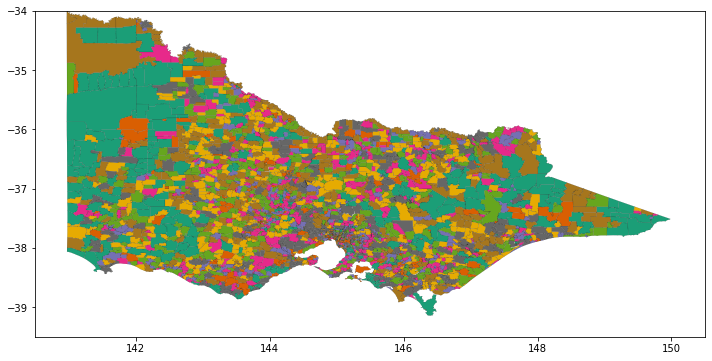

In [88]:
cm = matplotlib.cm.get_cmap('Dark2')

Nshp = len(shapes)
cccol = cm(1.*numpy.arange(Nshp)/Nshp) # one colour for every suburb...
# plot size
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)

#Plot each suburb
for nshp in range(Nshp):
    ptchs   = []
    pts     = numpy.array(shapes[nshp].points)
    prt     = shapes[nshp].parts
    par     = list(prt) + [pts.shape[0]]
    
    for pij in range(len(prt)): 
        ptchs.append(patches.Polygon(pts[par[pij]:par[pij+1]]))

    ax.add_collection(PatchCollection(ptchs,facecolor=cccol[nshp,:],edgecolor='k', linewidths=.1))
    
ax.set_xlim(140.5,150.5)
ax.set_ylim(-39.5,-34)

plt.show()

Lets look at first records row

In [89]:
recs[0]

Record #0: ['6670', datetime.date(2011, 8, 31), None, 'VIC2615', datetime.date(2012, 4, 27), None, 'UNDERBOOL', '', '', 'G', None, '2']

We see that 6th index of each record has suburb name.

Recs and shapes contain information about each suburb in each row. The order of information about each suburb is same in both of these lists, i.e. 1st row in recs and shapes corresponds to same suburb, and likewise for all rows.

In [90]:
def get_suburb(x):
    '''
    x: [longitude, latitude] of property
    return: 
        suburb:string
    '''
    #Create a point
    property_point = Point(x[1], x[0])
    
    for index_shape, shape in enumerate(shapes):
        suburb_region = Polygon(shape.points)

        if property_point.within(suburb_region):
            return recs[index_shape][6]

In [92]:
# house_df = pd.merge(house_df, reshaping_df[['ID','Suburb']], on=['ID'])

In [138]:
#store suburbs in a new column  
house_df['Suburb'] = house_df[['Lattitude', 'Longtitude']].apply(lambda x: get_suburb(x), axis=1)

In [93]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 687
Data columns (total 22 columns):
ID                               688 non-null object
Address                          688 non-null object
Rooms                            688 non-null int64
Type                             688 non-null object
Price                            688 non-null float64
Date                             688 non-null object
Bathroom                         688 non-null float64
Car                              688 non-null float64
Landsize                         688 non-null float64
Age                              688 non-null float64
Lattitude                        688 non-null float64
Longtitude                       688 non-null float64
closest_primary_school           688 non-null object
distance_to_closest_primary      688 non-null float64
primary_school_ranking           688 non-null object
closest_secondary_school         688 non-null object
distance_to_closest_secondary    688 non

In [94]:
house_df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,closest_primary_school,distance_to_closest_primary,primary_school_ranking,closest_secondary_school,distance_to_closest_secondary,secondary_school_ranking,train_station_id,distance_to_train_station,travel_min_to_CBD,Suburb
0,ID122964121,121 Murray Rd,4,h,830000.0,3/06/2017,1.0,2.0,540.0,54.0,...,Holy Name School,1.055208,463,Preston High School,0.821495,not ranked,20012,1291.662208,28.300000,PRESTON
1,ID161649164,77 Highfield Rd,5,h,3550000.0,18/03/2017,4.0,4.0,684.0,6.0,...,Canterbury Primary School,0.221939,43,Siena College Ltd,0.302698,not ranked,19894,906.329970,25.769231,CANTERBURY
2,ID574447673,56 Hall St,2,h,890000.0,8/04/2017,1.0,0.0,165.0,79.0,...,Sacred Heart School,0.281517,66,Bayside P-12 College,1.806498,243,19994,140.025326,16.310345,NEWPORT
3,ID857527692,25 Sydney St,4,h,816000.0,10/09/2016,1.0,2.0,837.0,89.0,...,St Theresa's School,0.170962,393,Sunshine College,1.073238,233,20004,586.186237,26.375000,ALBION
4,ID115945460,4 Walter St,3,h,1045000.0,29/04/2017,2.0,3.0,526.0,29.0,...,Bayside P-12 College,1.013598,not ranked,Bayside P-12 College,1.013598,243,19993,1332.454148,20.857143,WILLIAMSTOWN NORTH


# 6. Overpriced? column

A boolean feature indicating whether or not the price of the property is higher than the median price of similar properties (with respect to bedrooms, bathrooms, parking_space, and property_type attributes) in the same suburb on the year of selling.

We will be creating a year column by extracting year from date. 

In [139]:
#extract year from Date
house_df['year'] = pd.to_datetime(house_df['Date']).dt.year

In [140]:
#group dataframe on all column names mentioned above and aggregate on median
grouped_df = house_df.groupby(['Rooms', 'Bathroom', 'Car', 'Type', 'Suburb', 'year']).agg({'Price':'median'}).reset_index()
#rename price as median_price
grouped_df.rename(columns={'Price':'median_price'}, inplace=True)
grouped_df.head()

,Rooms,Bathroom,Car,Type,Suburb,year,median_price
0,1,1.0,0.0,h,FAWKNER,2017,515000.0
1,1,1.0,0.0,u,BRUNSWICK WEST,2016,300000.0
2,1,1.0,0.0,u,SOUTH YARRA,2017,436000.0
3,1,1.0,0.0,u,WINDSOR,2017,350000.0
4,1,1.0,1.0,h,BRUNSWICK,2016,772000.0


In [141]:
grouped_df.shape

(628, 7)

Merge this grouped dataframe to original dataframe.

In [142]:
# merge on ['Rooms', 'Bathroom', 'Car', 'Type', 'Suburb', 'year']
house_df = house_df.merge(grouped_df, on=['Rooms', 'Bathroom', 'Car', 'Type', 'Suburb', 'year'])

We will now compare price of each property with median_price of matching group to see if the value is greater than the median price. If it is, we will assign True to over_priced column otherwise False.

In [143]:
# Create over_priced column with true value if price of property is more than median price
house_df['over_priced?'] = house_df['Price'] > house_df['median_price']

In [144]:
house_df.drop(['year'], axis=1, inplace=True)

# 7. Reading data from the councils.txt file 

We will first identify the LGA for a property using the councils.txt file. We read the councils.txt file and convert it into a dataframe containing LGAs and a list of their corresponding Suburbs.

In [145]:
# Reading the councils.txt file
councils_df =  pd.read_csv('external_data/councils.txt', sep=':', header= None)
councils_df.columns = ['LGA', 'Suburb']

# Convert Suburb string into list
councils_df['Suburb'] = councils_df['Suburb'].apply(lambda x: x.replace("'",'').strip().strip("][").split(','))

# Removing leading and trailing whitespaces
def strip_values(input_list):
    for i in range(len(input_list)):
                   input_list[i] = input_list[i].strip().upper()
    return input_list

# Saving the values of LGA and Suburbs into a dataframe
councils_df['Suburb'] = councils_df['Suburb'].apply(lambda x: strip_values(x))
councils_df['LGA'] = councils_df['LGA'].apply(lambda x: x.strip())

For house_df, extracting LGA for each property by finding the record in councils_df where the house's suburb is a subset of the LGA's suburbs

In [146]:
# Extracting LGA from councils_df based on Suburb
house_df['LGA'] = house_df['Suburb'].apply(lambda x: councils_df[councils_df.Suburb.map(set([x]).issubset)].iloc[0,0])

# Reading data from the input .xlsx file 

Reading the input .xlsx file to a pandas dataframe. Parameters are set to:
* Read from the relevant sheet
* Read from the relevant rows and columns

In [147]:
# Reading the .xlsx file. Data is read from:
# * Sheet = Table 1
# * Columns from B to J
# * 9086 rows starting from row 20 

crime_df = pd.read_excel("external_data/crimebylocationdatatable-yearending31march2016.xlsx", 
                            sheet_name = "Table 1", usecols = "B:J", skiprows = 19, nrows = 9086)

# 8. Extracting crime statistics 

Now that we have the LGA each property belongs to, we use the crime xlsx file to find the relevant crime statistics.

In [148]:
# Extracting first character from the CSA Offence Division column as Crime_Division
crime_df['Crime_Division'] = crime_df['CSA Offence Division'].apply(lambda x: x[0])

In [149]:
# Extracting year from the Date column in the input csv file
house_df['Year'] = house_df['Date'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').year)

In [150]:
# Creating a function to calculate average crime for a particular LGA, crime division and three year period
def get_crime_avg (crime_div, year, LGA):
    
    # Filtering the dataframe to include only the records corresponding to the relevant LGA, Crime type and three year period
    filt_df = crime_df.loc[(crime_df['Local Government Area'] == LGA) & 
                           (crime_df['Crime_Division'] == crime_div) & 
                           (crime_df['Apr - Mar reference period'].isin(list(range(year-3,year))))]
    
    # Rolling up the value of Offence Count using summation to a LGA, Crime Type, Year level
    rollup_df = filt_df.groupby(
        ['Local Government Area', 'Apr - Mar reference period','Crime_Division'],as_index=False
    ).agg({'Offence Count':'sum'})
    
    # Returning the average value of the Offence Count for a LGA - Crime type combination
    return rollup_df['Offence Count'].mean()

**crime_A_average** represents the average of type A crime in the local government area the property belongs to, in the three years prior to selling the property as the property. For example, if a property is sold in 2016, then you should calculate the
average of the crime type A for 2013, 2014 and 2015.

Similarly, **crime_B_average** and **crime_C_average** represents the average of type B and type C crime respectively.

In [151]:
# For each property, calculating the relevant average of type A, B and C crimes
house_df['crime_A_average'] = house_df.apply(lambda x: get_crime_avg('A', x['Year'], x['LGA']), axis=1)
house_df['crime_B_average'] = house_df.apply(lambda x: get_crime_avg('B', x['Year'], x['LGA']), axis=1)
house_df['crime_C_average'] = house_df.apply(lambda x: get_crime_avg('C', x['Year'], x['LGA']), axis=1)

In [152]:
house_df.drop(['LGA','Year', 'median_price'], inplace=True, axis=1)

In [153]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 687
Data columns (total 26 columns):
ID                               688 non-null object
Address                          688 non-null object
Rooms                            688 non-null int64
Type                             688 non-null object
Price                            688 non-null float64
Date                             688 non-null object
Bathroom                         688 non-null float64
Car                              688 non-null float64
Landsize                         688 non-null float64
Age                              688 non-null float64
Lattitude                        688 non-null float64
Longtitude                       688 non-null float64
closest_primary_school           688 non-null object
distance_to_closest_primary      688 non-null float64
primary_school_ranking           688 non-null object
closest_secondary_school         688 non-null object
distance_to_closest_secondary    688 non

In [156]:
house_df.rename(columns={'Landsize':'LandSize', 'Lattitude':'Latitude', 'Longtitude':'Longitude'}, inplace=True)

In [157]:
house_df.to_csv('final_dataset.csv', index=False)

# Data Reshaping

We will just focus on four columns as of now. More detained analysis on other columns can be performed and necessary features can be added to the linear model

Here, we plan to study the effect of different normalization/transformation methods (i.e. standardization, min-max normalization, log, power, and root transformation) on Rooms , crime_C_average, travel_min_to_CBD , and property_age attributes.

Lets build linear model with all these variables and find the R2, and we will consider R2(R square) as performance metric.

In [158]:
reshaping_df = house_df.copy()

In [159]:
#Linear model on Rooms, crime_C_average, travel_min_to_CBD and property_age 
X = reshaping_df[['Rooms', 'crime_C_average', 'travel_min_to_CBD','Age']]
y = reshaping_df['Price']

regressor = LinearRegression()
regressor.fit(X, y)

y_pred = regressor.predict(X)

print("Rooms coeff: ",regressor.coef_[0], "\nCrime_C_average coeff: ",regressor.coef_[1], "\ntravel_min_to_CBD coeff: ",
      regressor.coef_[2],"\nAge coeff: ",regressor.coef_[3])
print("R square score: ",r2_score(y,y_pred))

Rooms coeff:  391497.50988075783 
Crime_C_average coeff:  160.85777773774134 
travel_min_to_CBD coeff:  -16051.613634410596 
Age coeff:  1068.5684894866204
R square score:  0.3844645604735838


We can notice that the coefficient of each feature is not uniform. ie. **Crime_c_average** and **Age** is given very less importance in the model. We should use transformation for both of these variables.

We assume that feature importance for each of the variables should have similar magnitude considering all variables as equally important.

Now we have this R2, we will see how transformation/normalization can be useful in improving the model.

### 1. Effect of crime_c_average

Let's look at how Crime_C_average column values are distributed.

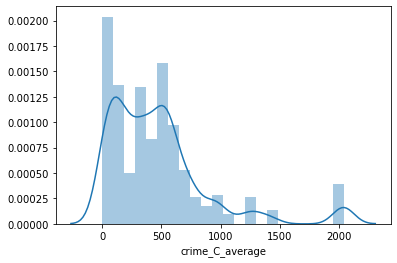

In [160]:
sns.distplot(reshaping_df['crime_C_average'])

We can see that the distrbution has a long tail, it would be better to see its relationship with target variable which is Price

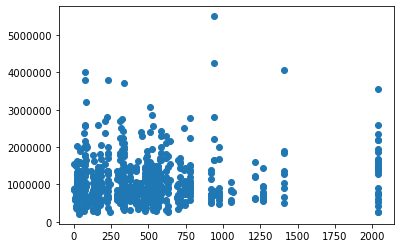

In [161]:
plt.scatter(reshaping_df['crime_C_average'], reshaping_df['Price'])

We can see from this graph that there are a lot of values between 0-200 and very few between 350-500. In order to make improve this linear model, we should transform the data such that the distribution looks normal. We need to reduce the effect of long tail.     

Looking at the distribution of data, as we need to squizz the data to smaller range, we have two options: log and square transformation. As we have considerable amount of values between(50-300) of crime_c_average, log transformation would bring those values in shorter range from (4-6) and will introduce tail on left side. 

This effect can be observed as log transformation is too strong on smaller values and very weak on large values so it pushes them to much shorter range leaving behind tail for values of crime_c_average in range(0-50)

Moreover, root transform is less strong than log and it does not transform smaller values (50-300) drastically like log. This effect will push the data such that distribution is not drastically shifted we will be able to see distribution normally spread in the entire range. 

Below you can see plot after square transformation.

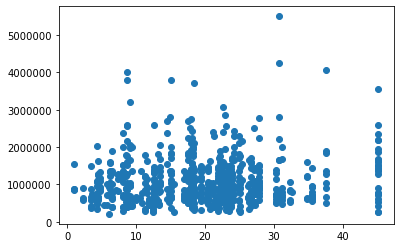

In [162]:
plt.scatter(reshaping_df['crime_C_average']**0.5, reshaping_df['Price'])

We can see here that the data is squizzed to shorter range.

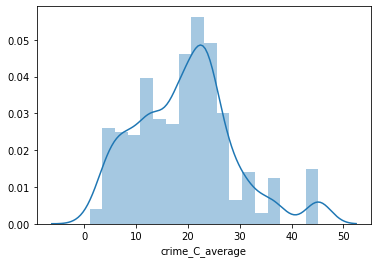

In [163]:
sns.distplot(reshaping_df['crime_C_average']**0.5)

Hence, we can see the distribution shape looks like normal, and the effect of long tail is suppressed.

### 2. Effect of Age attribute 

Let's look at how Age column values are distributed.

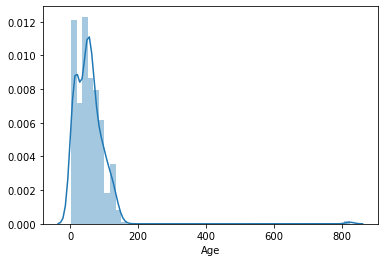

In [164]:
sns.distplot(reshaping_df['Age'])

We can see that the distrbution has a presence of outliers, it would be better to see its relationship with target variable which is Price

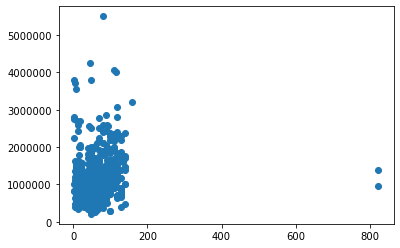

In [165]:
plt.scatter(reshaping_df['Age'], reshaping_df['Price'])

We can see from this graph that there are a lot of values between 0-200 and 2 points > 800 as outlier. In order to make improve this linear model, we should transform the data such that the distribution spread out to normal. 

Looking at the distribution of data, as we need to squizz the data to smaller range and nullify the effect of two outliers. We can use root square transformation for this. But we need to see if we don't have considerable values below 1. As square root transform is strong on values below 1. 

In [166]:
(reshaping_df['Age']>1).value_counts()

True    688
Name: Age, dtype: int64

We checked above that for all the property, value of age is more than 1. So we can spread the data in shorter range.

Log transformation would have bring the data together but the range of value would be much smaller (0-7). Root transformation bring the data to range (0-30) introducing variance in data. This will not only spread the data but also, bring data to range larger than that of log transformation.

Below you can see plot after square transformation.

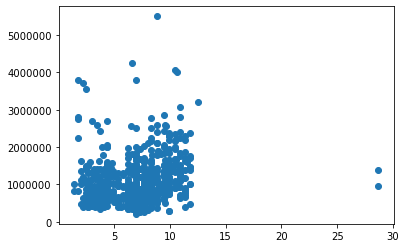

In [167]:
plt.scatter(reshaping_df['Age']**0.5, reshaping_df['Price'])

We can see here that the data is squizzed to shorter range.

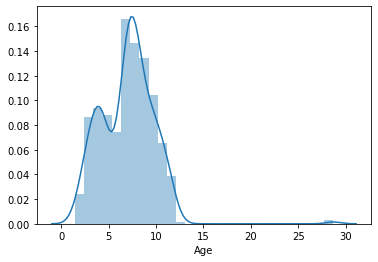

In [168]:
sns.distplot(reshaping_df['Age']**0.5)

Hence, we can see the distribution shape looks like normal.

Now we have transformed our data, we should rebuild the model on this data to see effects on model.


In [175]:
#Linear model on Rooms, crime_C_average, travel_min_to_CBD and property_age 
reshaping_df['crime_C_average_sqrt'] = reshaping_df['crime_C_average']**0.5
reshaping_df['Age_sqrt'] = reshaping_df['Age']**0.5
X = reshaping_df[['Rooms', 'crime_C_average_sqrt', 'travel_min_to_CBD','Age_sqrt']]
y = reshaping_df['Price']

regressor = LinearRegression()
regressor.fit(X, y)

y_pred = regressor.predict(X)

print("Rooms coeff: ",regressor.coef_[0], "\nCrime_C_average coeff: ",regressor.coef_[1], "\ntravel_min_to_CBD coeff: ",
      regressor.coef_[2],"\nAge coeff: ",regressor.coef_[3])
print("R square score: ",r2_score(y,y_pred))

Rooms coeff:  393449.1317385757 
Crime_C_average coeff:  6559.409021340649 
travel_min_to_CBD coeff:  -15872.058975687141 
Age coeff:  27810.818783371145
R square score:  0.38974797016542306


We can see that R square score has improved after transformation.

Moreover, the magnitude of coefficient of `crime_c_average` and `Age` has increased now.

### 3. Effect of Rooms variable:

Let us look at distribution of rooms values from the dataset.

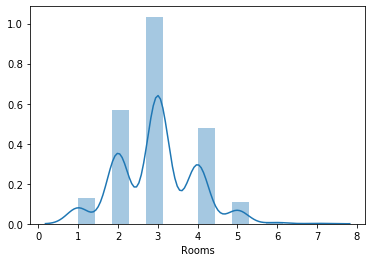

In [174]:
sns.distplot(reshaping_df['Rooms'])

We can see that the distrbution sees alright, it would be better to see its relationship with target variable which is Price

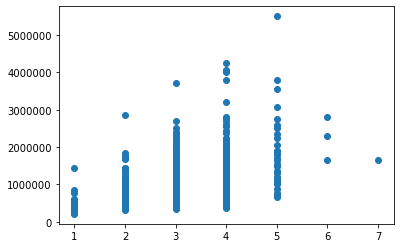

In [181]:
plt.scatter(reshaping_df['Rooms'], reshaping_df['Price'])

As shape of the distbribution looks alright, we don't need any transformation. It feels like transforming using log will improve the distribution, but it won't be affected much so we will keep it as it is.

### 4. Effect of travel_min_to_CBD 

Lets plot distribution of travel min to CBD

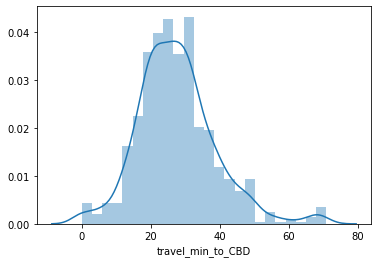

In [129]:
sns.distplot(reshaping_df['travel_min_to_CBD'])

We can see that the shape of the distrbution looks normal. Let us see its relation with Price

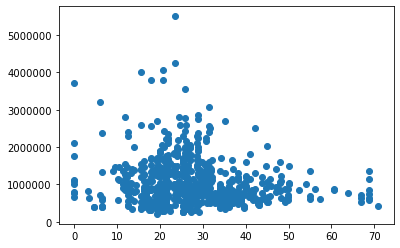

In [180]:
plt.scatter(reshaping_df['travel_min_to_CBD'], reshaping_df['Price'])

We can see the data is evenly spread and seems to have normal shape. So we won't require any transformation.

#### Standardization

We discussed about the effect of transformation which changes the shape of the distrbution of the data. 

But we also need to think if standardization is necessary or not for linear model. For linear models, standardization will never improve the Rsquare value as this effect just shift the entire range of data and does not change the shape. Hence, if we standardize the variables using any method (min-max, z-score normalize), we won't see difference in R square value. This is possible because the betas are estimated such that they convert the units of each explanatory variable(predictors) into the units of the response variable appropriately.

Let us take simple example,

Consider the sample model: $y=\beta_0+\beta_1x_1+\beta_2x_2+\ldots+\epsilon$

By looking at the equations for the estimators we can see that scaling $x1$ with a factor $a$ scales $β1$ by a factor $1/a$. To see this, note that

$\hat{\beta}_1(x_1)=\frac{\sum_{i=1}^n(x_{1,i}-\bar{x}_1)(y_i-\bar{y})}{\sum_{i=1}^n(x_{1,i}-\bar{x}_1)^2}$

Hence,

$\hat{\beta}_1(ax_1)=\frac{\sum_{i=1}^n(ax_{1,i}-a\bar{x}_1)(y_i-\bar{y})}{\sum_{i=1}^n(ax_{1,i}-a\bar{x}_1)^2}=\frac{a\sum_{i=1}^n(x_{1,i}-\bar{x}_1)(y_i-\bar{y})}{a^2\sum_{i=1}^n(x_{1,i}-\bar{x}_1)^2}=\frac{\hat{\beta}_1(x_1)}{a}.$

Similary by calculating other betas $\beta$s we can see that scaling the data scales the slopes and won't have effect on sum of square of residuals.

Hence, standardization will help us bring the slope into (0-1) range and centre the input variables(for z-score norm), but can be done for making regression equations more meaningful in terms of importance of explanatory variables.

Lets build the model by standardizing the input as per z-score normalization. This can be done by passing `normalized=True` in the model

### Transforming Target variable

Lets us look at the distribution of target variable which is `price`

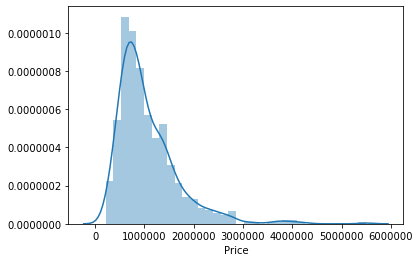

In [182]:
sns.distplot(reshaping_df['Price'])

We see from the distribution that the target variable is skewed. Also outliers are present in the data. So extreme value of predictor hinders the preformance of the model.

Due to the non-linearity, the model trained will not be precise for prediction. Moreover, a log transformation is used to linearize the targets, allowing better prediction even with a similar linear model. This transformation with sooth out the sensitivity to outliers and make our model more robust to outliers. 

Also, price column does not contain any 0 otherwise we would have used log(x+1) transformation.

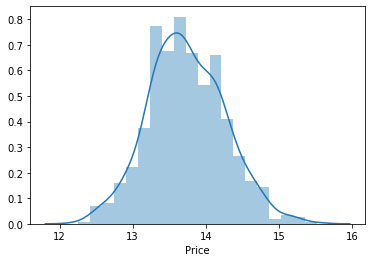

In [184]:
sns.distplot(reshaping_df['Price'].apply(log))

After transformation we can see that distribution looks symmetric(normalized) which is good for the model.

In [185]:
#Linear model on Rooms, crime_C_average, travel_min_to_CBD and property_age 
reshaping_df['crime_C_average_sqrt'] = reshaping_df['crime_C_average']**0.5
reshaping_df['Age_sqrt'] = reshaping_df['Age']**0.5
X = reshaping_df[['Rooms', 'crime_C_average_sqrt', 'travel_min_to_CBD','Age_sqrt']]
y = reshaping_df['Price'].apply(log)

regressor = LinearRegression(normalize=True)
regressor.fit(X, y)

y_pred = regressor.predict(X)

print("R square score: ",r2_score(y,y_pred))

R square score:  0.4532254167247388


We see the effect in R square value. It has improved significantly.

Here, we just planned to use LinearRegression for our study with only four variables. With more data, more exploratoy analyis can be performed and sophisticated modelling techniques can be applied to build more robust and accurate model. This will be the future work for this project. 

# References:

[1.] `BeautifulSoup PYPI project.` Retrieved from https://pypi.org/project/beautifulsoup4/


[2.] *Distance between two latitude and longitude points* by `Michael` 2016 https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude


[3.] *Scaling on regression inputs* by Andrew from `statistics in Medicine` http://www.stat.columbia.edu/~gelman/research/published/standardizing7.pdf

[4.] Standardization in linear models by `MansT` 2012, https://stats.stackexchange.com/questions/29781/when-conducting-multiple-regression-when-should-you-center-your-predictor-varia

[5.] *Python regular expression readings.* Retrieved from https://docs.python.org/3/library/re.html

[6.]  The `pandas` Project. (2016a). *pandas 0.19.2 documentation: pandas.DataFrame.to_csv*. Retrieved from http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv

[7.] `sklearn.linear_model.LinearRegression` *Using Linear regression* Retrieved from: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html